In [4]:
import tensorflow as tf

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [6]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170500096/170498071 [==============================] - 5s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [7]:
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 10


In [8]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5732 - accuracy: 0.4249 - val_loss: 1.3166 - val_accuracy: 0.5248
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2877 - accuracy: 0.5363 - val_loss: 1.1321 - val_accuracy: 0.5931
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1625 - accuracy: 0.5824 - val_loss: 1.0790 - val_accuracy: 0.6258
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0704 - accuracy: 0.6202 - val_loss: 0.9850 - val_accuracy: 0.6511
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9936 - accuracy: 0.6458 - val_loss: 0.9364 - val_accuracy: 0.6661
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9302 - accuracy: 0.6701 - val_loss: 0.9103 - val_accuracy: 0.6811
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8756 - accuracy: 0.6897 - val_loss: 0.8885 - val_accuracy:

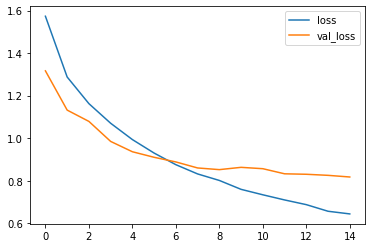

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

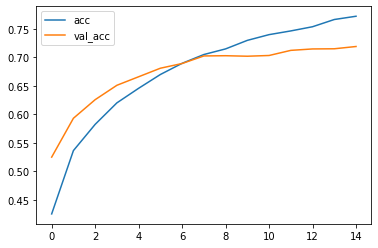

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[728  24  33  32  11   4   7   9  97  55]
 [ 14 846   2   8   2   3   8   1  40  76]
 [ 75   9 572  91  80  72  44  27  18  12]
 [ 24   7  45 548  63 192  60  24  17  20]
 [ 23   4  79  71 671  51  32  48  15   6]
 [ 12   5  36 183  47 637  20  43   9   8]
 [  3   6  34  74  46  35 777   8  13   4]
 [ 14   3  14  50  71  60   6 751   6  25]
 [ 48  31  11  14   6   7   4   2 854  23]
 [ 28  86   8  17   3   6  11   7  25 809]]


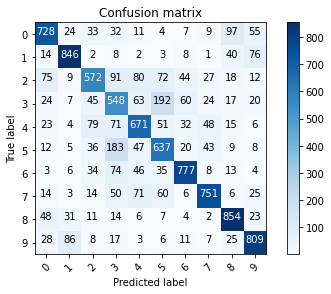

In [12]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [13]:
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

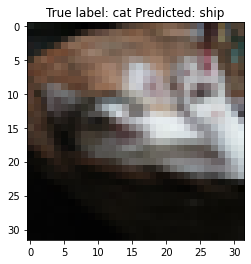

In [16]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));